Presented By: Prince Pritam

The following code showcases the use of Sentiment Analysis and Machine Learning model (Logistic Regression) on Movie Reviews using Python as a complete Web Application.

1. Importing Libraries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


2. Reading the Data Set:

In [ ]:
data=pd.read_csv("/IMDB Dataset.csv")
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
495,"""American Nightmare"" is officially tied, in my...",negative
496,"First off, I have to say that I loved the book...",negative
497,This movie was extremely boring. I only laughe...,negative
498,I was disgusted by this movie. No it wasn't be...,negative


In [ ]:
#lets see how many positive and how many negative reviews are there:
data['sentiment'].value_counts()

,count
sentiment,
negative,263
positive,237


In [ ]:
#Now lets check if there are any missing values:
data.isnull().sum()

,0
review,0
sentiment,0


In [ ]:
#lets check if there is in duplicates:
data.dropna(inplace=True)
data.duplicated().sum()

0

3. 3. Data Pre-Processing:

In [ ]:
def clean_review(review):
  str= ' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
  return str

In [ ]:
data['review'] = data['review'].apply(clean_review)

In [ ]:
data['review']

,review
0,One reviewers mentioned watching 1 Oz episode ...
1,wonderful little production. filming technique...
2,thought wonderful way spend time hot summer we...
3,Basically there's family little boy (Jake) thi...
4,"Petter Mattei's ""Love Time Money"" visually stu..."
...,...
495,"""American Nightmare"" officially tied, opinion,..."
496,"First off, say loved book Animal Farm. read 9t..."
497,movie extremely boring. laughed times. decided...
498,"disgusted movie. graphic sex scenes, ruined im..."


4. Create Word Cloud:

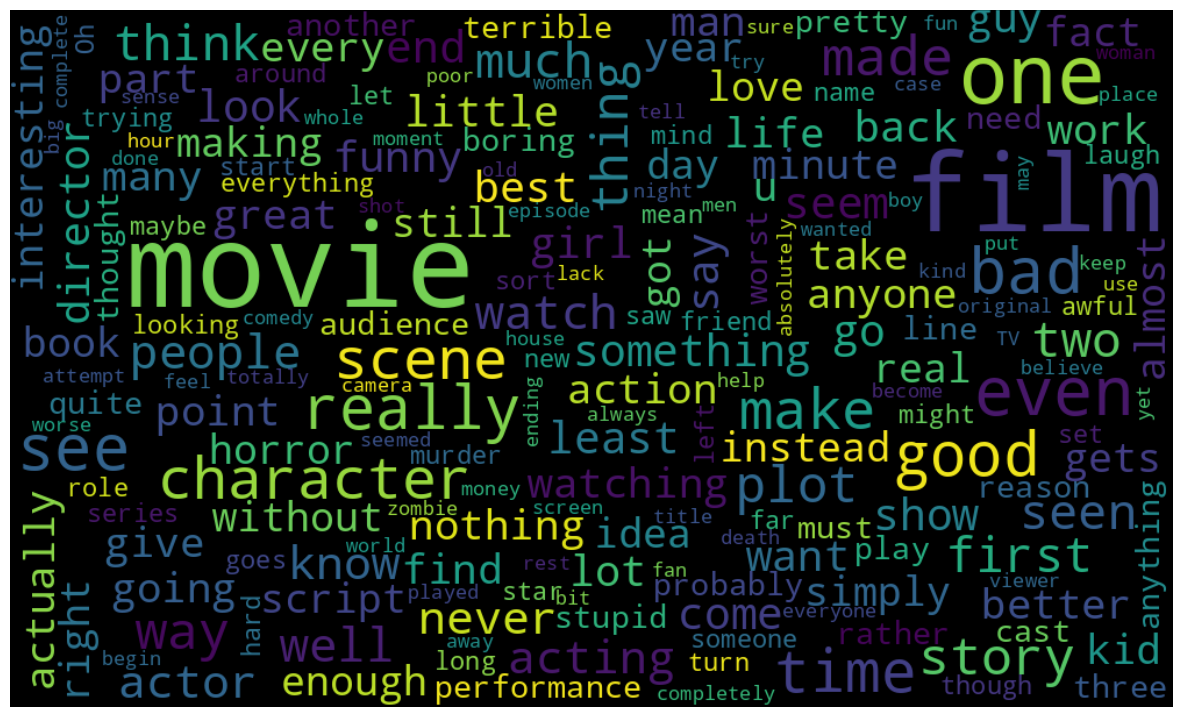

In [ ]:
#wordcloud
from wordcloud import WordCloud

#draw wordcloud for all negative reviews:
reviews= ' '.join(word for word in data['review'] [data['sentiment']=='negative'].astype(str))
wordcloud =   WordCloud(height=600, width=1000, max_font_size=100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()



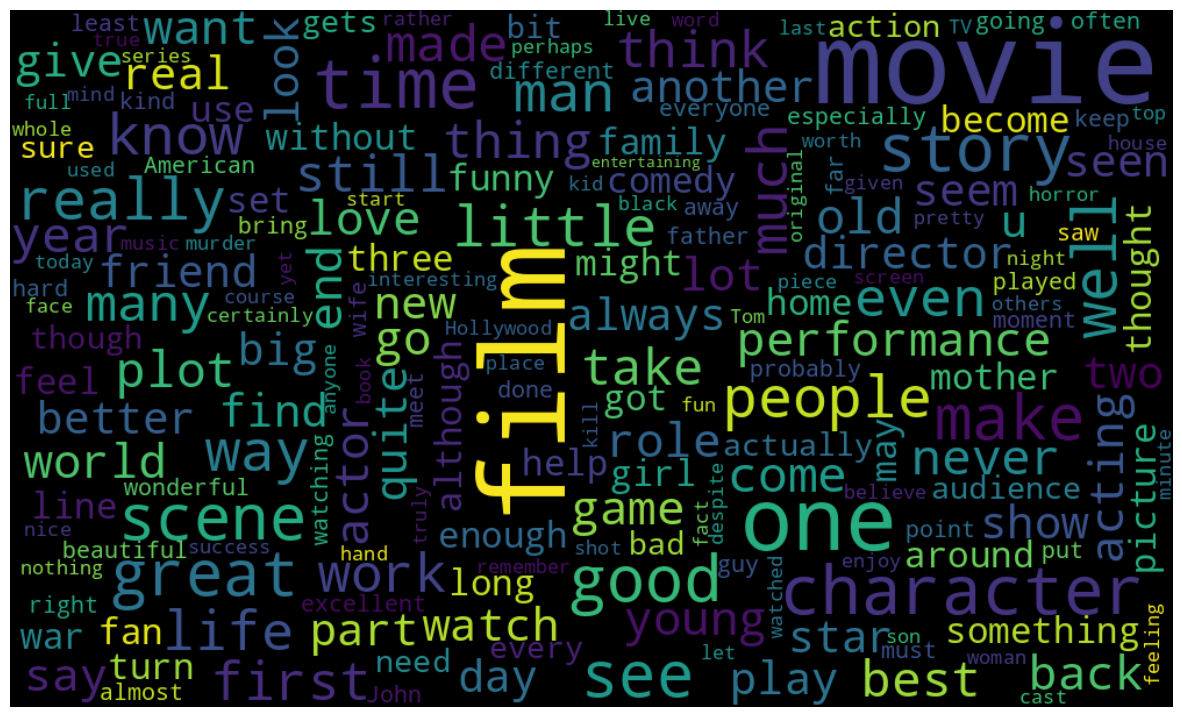

In [ ]:
#draw wordcloud for all positive reviews:

reviews= ' '.join(word for word in data['review'] [data['sentiment']=='positive'].astype(str))
wordcloud= WordCloud(height=600, width=1000, max_font_size=100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

5. Converting the Text size into Numerical Values to be used for ML Model:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=2500)

In [ ]:
reviews = tfidf.fit_transform(data['review']).toarray()

In [ ]:
data['sentiment']=data['sentiment'].replace(['positive','negative'],[ 1,0])

In [ ]:
data['sentiment'].value_counts()

,count
sentiment,
0,263
1,237


6. Creating ML Model:

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()


In [ ]:
from sklearn.model_selection import train_test_split
reviews_train, reviews_test, sentiment_train, sentiment_test = train_test_split(reviews, data['sentiment'], test_size=0.2)

In [ ]:
model.fit(reviews_train, sentiment_train)

LogisticRegression()

In [ ]:
predict = model.predict(reviews_test)

<Figure size 1000x1000 with 0 Axes>

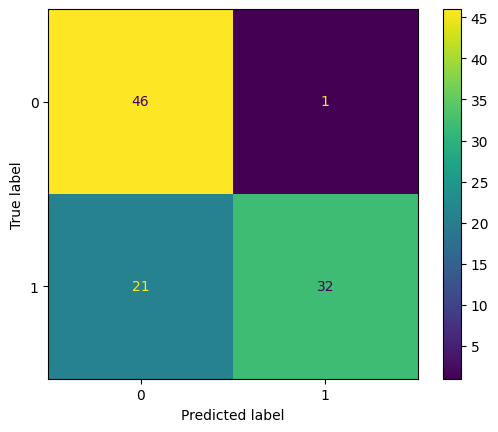

In [ ]:
#lets check how accurately the model predicts the Sentiments:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(sentiment_test, predict, labels = model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
plt.figure(figsize=(10,10))
display.plot()
plt.show()


The Confusion Matrix helps us to understand how accurate the model is and what are the pression and recall of the model.

THANK YOU !